## lec 4 use SQL

### review python

In [176]:
demo_str = 'this is my string'

for word_item in demo_str.split():
    print(word_item)

this
is
my
string


In [177]:
print('{} + {} is {}'.format(1,2,1+2))

1 + 2 is 3


## Install or import libs

In [178]:
!pip install psycopg2

You should consider upgrading via the '/home/ec2-user/anaconda3/envs/python3/bin/python -m pip install --upgrade pip' command.


In [179]:
import pandas
import configparser
import psycopg2

## establish connection

In [180]:
config = configparser.ConfigParser()
config.read('config.ini')

host = config['myaws']['host']
db = config['myaws']['db']
user = config['myaws']['user']
pwd = config['myaws']['pwd']


In [181]:
conn = psycopg2.connect(
                        host = host,
                        user = user,
                        password = pwd,
                        database = db
                        )

In [182]:
cur = conn.cursor()

## query the data

In [183]:
sql_statement = """
                select bathroom,bedroom
                from public.house_price
                where bathroom >2
                """

In [184]:
cur.execute(sql_statement)

In [185]:
cur.fetchone()

(4, 5)

In [186]:
for bathroom,bedroom in cur.fetchall()[:10]:
    print(bathroom,bedroom)

3 3
3 4
5 4
3 3
6 5
6 5
3 3
3 3
4 5
4 5


## pandas

In [187]:
import pandas

In [188]:
df = pandas.read_sql_query(sql_statement,conn)

df[:10]

,bathroom,bedroom
0,4,5
1,3,3
2,3,4
3,5,4
4,3,3
5,6,5
6,6,5
7,3,3
8,3,3
9,4,5


In [189]:
sql_avg_price_year = """
                    select built_in,
                    avg(price) as avg_price
                    from public.house_price
                    group by built_in
                    order by built_in
                        """

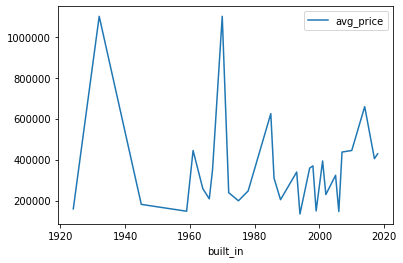

In [190]:
df = pandas.read_sql_query(sql_avg_price_year,conn)
df.plot(x = 'built_in', y = 'avg_price')